# Title : Employee Sentiment & Company Performance Analysis using AmbitionBox Data

## Step1 : Problem Statement

+ Analyze employee reviews and ratings collected from AmbitionBox,

+ Understand overall employee sentiment and workplace satisfaction,

+ Identify key factors influencing company ratings,

+ Compare companies based on employee feedback and performance,

+ Discover patterns and trends in employee reviews,

+ Provide data-driven insights to support job seekers and HR teams.

## Step2 : Data Collection
Importing Required libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup
import time

Checking the status code helps identify access issues and prevents scraping errors caused by blocked or unavailable pages.


In [6]:
url = "https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget"

In [7]:
request = requests.get(url)

In [8]:
request.status_code

403

**Observation** : 404 Not Found → Page or URL does not exist.

## Web Scraping

In [10]:
company_names = []
ratings = []
reviews_count = []
salary_count = []
interview_count = []
jobs_count = []
company_sector = []
locations = []
benefits_count = []
page_num = []

base_url = "https://www.ambitionbox.com/list-of-companies?campaign=homepage_companies_widget"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9'
}
#

total_time = time.time()

for i in range(1, 51):   # you can increase till 100 if needed
    start_time = time.time()
    url = f"{base_url}&page={i}"
    page = requests.get(url, headers=headers)
    s = BeautifulSoup(page.text, "html.parser") #

    cards = s.find_all('div', attrs={'class': 'companyCardWrapper'}) #
    if not cards:
        print(f"No data found on page {i}, stopping...")
        break

    # Company Name
    for x in s.find_all('h2', attrs={'class': 'companyCardWrapper__companyName'}):
        company_names.append(x.text.strip() if x else np.nan)

    # Rating
    for x in s.find_all('div', attrs={'class': 'rating_star_container'}):
        ratings.append(x.text.strip() if x else np.nan)

    # Reviews
    for x in s.find_all('span', attrs={'class': 'companyCardWrapper__ActionTitle'}, string='Reviews'):
        val = x.find_previous_sibling('span')
        reviews_count.append(val.text.strip() if val else np.nan)

    # Salaries
    for x in s.find_all('span', attrs={'class': 'companyCardWrapper__ActionTitle'}, string='Salaries'):
        val = x.find_previous_sibling('span')
        salary_count.append(val.text.strip() if val else np.nan)

    # Interviews
    for x in s.find_all('span', attrs={'class': 'companyCardWrapper__ActionTitle'}, string='Interviews'):
        val = x.find_previous_sibling('span')
        interview_count.append(val.text.strip() if val else np.nan)

    # Jobs
    for x in s.find_all('span', attrs={'class': 'companyCardWrapper__ActionTitle'}, string='Jobs'):
        val = x.find_previous_sibling('span')
        jobs_count.append(val.text.strip() if val else np.nan)

    # Sector and Location
    for x in s.find_all('span', attrs={'class': 'companyCardWrapper__interLinking'}):
        text = x.text.strip()
        parts = text.split('|')
        company_sector.append(parts[0].strip() if len(parts) > 0 else np.nan)
        locations.append(parts[1].strip() if len(parts) > 1 else np.nan)

    # Benefits
    for x in s.find_all('span', attrs={'class': 'companyCardWrapper__ActionTitle'}, string='Benefits'):
        val = x.find_previous_sibling('span')
        benefits_count.append(val.text.strip() if val else np.nan)

    # Page Number
    for _ in range(len(cards)):
        page_num.append(i)

    print(f"Page {i} completed in {time.time() - start_time:.2f} seconds")

print("Total Time Completed in seconds:", str(time.time() - total_time))


Page 1 completed in 0.66 seconds
Page 2 completed in 1.02 seconds
Page 3 completed in 0.85 seconds
Page 4 completed in 0.81 seconds
Page 5 completed in 0.70 seconds
Page 6 completed in 0.73 seconds
Page 7 completed in 0.92 seconds
Page 8 completed in 0.97 seconds
Page 9 completed in 0.72 seconds
Page 10 completed in 0.80 seconds
Page 11 completed in 0.80 seconds
Page 12 completed in 0.72 seconds
Page 13 completed in 0.73 seconds
Page 14 completed in 0.97 seconds
Page 15 completed in 0.75 seconds
Page 16 completed in 0.81 seconds
Page 17 completed in 1.22 seconds
Page 18 completed in 0.73 seconds
Page 19 completed in 0.71 seconds
Page 20 completed in 0.84 seconds
Page 21 completed in 0.72 seconds
Page 22 completed in 0.72 seconds
Page 23 completed in 0.93 seconds
Page 24 completed in 1.02 seconds
Page 25 completed in 0.70 seconds
Page 26 completed in 0.82 seconds
Page 27 completed in 0.94 seconds
Page 28 completed in 0.79 seconds
Page 29 completed in 0.81 seconds
Page 30 completed in 0.

Converting the data into a DataFrame

In [12]:
Ambition_df = pd.DataFrame({"Company_names":company_names,"Ratings":ratings,"Reviews_count":reviews_count,"Salary_count":salary_count,"Interview_count":interview_count,"Jobs_count":jobs_count,"Company_sector":company_sector,"Locations":locations,"Benefits_count":benefits_count,"Page_num":page_num})

Saving the DataFrame into CSV format

In [14]:
Ambition_df.to_csv("ambitionbox_employee_reviews.csv",index = False)

## Step3 : Data Cleaning

Load Dataset

In [25]:
ambitionbox = pd.read_csv("ambitionbox_employee_reviews.csv")

In [18]:
#View first few rows
ambitionbox.head()

,Company_names,Ratings,Reviews_count,Salary_count,Interview_count,Jobs_count,Company_sector,Locations,Benefits_count,Page_num
0,TCS,3.3,1.1L,9.8L,11.8k,2.1k,IT Services & Consulting,Bangalore / Bengaluru +439 other locations,10.6k,1
1,Accenture,3.7,71.3k,6.5L,9.2k,40.6k,IT Services & Consulting,Bangalore / Bengaluru +255 other locations,6.7k,1
2,Wipro,3.6,63.5k,4.8L,6.7k,6.9k,IT Services & Consulting,Hyderabad / Secunderabad +370 other locations,4.6k,1
3,Cognizant,3.6,59.8k,6L,6.3k,697,IT Services & Consulting,Hyderabad / Secunderabad +229 other locations,5.5k,1
4,Capgemini,3.7,51.4k,4.8L,5.4k,1.9k,IT Services & Consulting,Bangalore / Bengaluru +183 other locations,3.7k,1


**Observation**:The first few rows of the dataset show correctly structured.

In [20]:
#View last few rows
ambitionbox.tail()

,Company_names,Ratings,Reviews_count,Salary_count,Interview_count,Jobs_count,Company_sector,Locations,Benefits_count,Page_num
995,SYSKA LED Lights,2.9,1k,2.5k,58,--,Consumer Electronics & Appliances,Pune +156 other locations,80,50
996,TÜV NORD,3.7,1k,3.9k,77,19,"Testing, Inspection and Certification (TIC)",Pune +82 other locations,63,50
997,Hindustan Zinc,3.8,1k,4.3k,54,--,Metals & Mining,Udaipur +36 other locations,103,50
998,GlobalData,3.4,1k,5.7k,92,12,Analytics & KPO,Hyderabad / Secunderabad +22 other locations,101,50
999,Wheels,3.9,1k,5k,71,--,Auto Components,Chennai +46 other locations,72,50


**Observation**:The last few rows of the dataset show correctly structured.

## Column Description

| Column Name | Description |
|------------|-------------|
| Company_Name | Name of the company |
| Company_sector | Business sector or industry of the company |
| Ratings | Overall company rating given by employees |
| Reviews_count | Total number of employee reviews |
| Interview_count | Total number of interview experiences shared |
| Benefits_count | Number of benefits reviews available |
| Salary_count | Number of salary records available |
| Jobs_count | Total number of job postings |
| Primary_City | Main city where the company is located |
| Other_Locations_Count | Number of additional locations where the company operates |


In [23]:
# Dataset shape
ambitionbox.shape
print('Number of Rows:',ambitionbox.shape[0])
print('Number of Columns:',ambitionbox.shape[1])

Number of Rows: 1000
Number of Columns: 10


In [24]:
# Summary statistics
ambitionbox.describe()

,Ratings,Page_num
count,1000.000000,1000.000000
mean,3.811700,25.500000
std,0.326557,14.438091
min,1.300000,1.000000
25%,3.600000,13.000000
50%,3.900000,25.500000
75%,4.000000,38.000000
max,4.900000,50.000000


**Observation** : Most features are highly right-skewed, meaning a small number of companies dominate reviews, jobs, and salary data, while the majority have much lower values.

In [26]:
# Dataset information
ambitionbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company_names    1000 non-null   object 
 1   Ratings          1000 non-null   float64
 2   Reviews_count    1000 non-null   object 
 3   Salary_count     1000 non-null   object 
 4   Interview_count  1000 non-null   object 
 5   Jobs_count       1000 non-null   object 
 6   Company_sector   1000 non-null   object 
 7   Locations        999 non-null    object 
 8   Benefits_count   1000 non-null   object 
 9   Page_num         1000 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 78.3+ KB


**Observation** : The dataset contains 1 missing values, and features need to update data types.

`Reviews_count`,`Interview_count`,`Benefits_count`,`Salary_count`,`Jobs_count` Values need to be converted into numeric format.

In [29]:
def convert_k_l(value):
    value = str(value).strip().lower()
    
    if value.endswith('l'):
        return float(value.replace('l', '')) * 100000
    elif value in ['--', 'na', 'n/a', '']:
        return 0
    elif value.endswith('k'):
        return float(value.replace('k', '')) * 1000
    else:
        return float(value)

## hwruith

In [30]:
#values need to be converted into k X 1000, L X 100000
ambitionbox["Reviews_count"] = ambitionbox["Reviews_count"].apply(convert_k_l)

In [31]:
#values need to be convert k X 1000, L X 100000
ambitionbox["Interview_count"] = ambitionbox["Interview_count"].apply(convert_k_l)

In [32]:
#values need to be converted into k X 1000, L X 100000
ambitionbox["Benefits_count"] = ambitionbox["Benefits_count"].apply(convert_k_l)

In [33]:
#values need to be converted into k X 1000, L X 100000 and '--' removed
ambitionbox["Salary_count"] = ambitionbox["Salary_count"].apply(convert_k_l)

In [34]:
#values need to be converted into k X 1000, L X 100000 and '--' removed
ambitionbox["Jobs_count"] = ambitionbox["Jobs_count"].apply(convert_k_l)

`Location` column spliting into `Primary_City` and `Other_Locations_Count`

In [36]:
def clean_location(value):
    value = str(value)
    
    # Extract main location
    main_location = value.split('+')[0].strip()
    
    # Extract number of other locations
    match = re.search(r'\+(\d+)', value)
    other_locations = int(match.group(1)) if match else 0
    
    return pd.Series([main_location, other_locations])

In [37]:
# Location column converting into two columns based on prime location and location count
ambitionbox[["Primary_Location", "Other_Locations_Count"]] = (ambitionbox["Locations"].apply(clean_location))

In [38]:
# Rearranging Column Names
ambitionbox["Primary_City"] = ambitionbox["Primary_Location"].str.split('/').str[0].str.strip()

In [30]:
ambitionbox.head()

,Company_names,Ratings,Reviews_count,Salary_count,Interview_count,Jobs_count,Company_sector,Locations,Benefits_count,Page_num
0,TCS,3.3,1.1L,9.8L,11.8k,2.1k,IT Services & Consulting,Bangalore / Bengaluru +439 other locations,10.6k,1
1,Accenture,3.7,71.3k,6.5L,9.2k,40.6k,IT Services & Consulting,Bangalore / Bengaluru +255 other locations,6.7k,1
2,Wipro,3.6,63.5k,4.8L,6.7k,6.9k,IT Services & Consulting,Hyderabad / Secunderabad +370 other locations,4.6k,1
3,Cognizant,3.6,59.8k,6L,6.3k,697,IT Services & Consulting,Hyderabad / Secunderabad +229 other locations,5.5k,1
4,Capgemini,3.7,51.4k,4.8L,5.4k,1.9k,IT Services & Consulting,Bangalore / Bengaluru +183 other locations,3.7k,1


In [40]:
# To remove Locations,Primary_Location column from the dataset:
ambitionbox.drop(columns =["Locations","Primary_Location"],inplace = True)

In [41]:
# To remove Page_num column from the dataset:
ambitionbox.drop(columns =["Page_num"],inplace = True)

In [42]:
ambitionbox.head()

,Company_names,Ratings,Reviews_count,Salary_count,Interview_count,Jobs_count,Company_sector,Benefits_count,Other_Locations_Count,Primary_City
0,TCS,3.3,110000.0,980000.0,11800.0,2100.0,IT Services & Consulting,10600.0,439,Bangalore
1,Accenture,3.7,71300.0,650000.0,9200.0,40600.0,IT Services & Consulting,6700.0,255,Bangalore
2,Wipro,3.6,63500.0,480000.0,6700.0,6900.0,IT Services & Consulting,4600.0,370,Hyderabad
3,Cognizant,3.6,59800.0,600000.0,6300.0,697.0,IT Services & Consulting,5500.0,229,Hyderabad
4,Capgemini,3.7,51400.0,480000.0,5400.0,1900.0,IT Services & Consulting,3700.0,183,Bangalore


In [43]:
# View column names as a list
ambitionbox.columns

Index(['Company_names', 'Ratings', 'Reviews_count', 'Salary_count',
       'Interview_count', 'Jobs_count', 'Company_sector', 'Benefits_count',
       'Other_Locations_Count', 'Primary_City'],
      dtype='object')

Columns datatypes are converted to their respective datatypes:

In [45]:
ambitionbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company_names          1000 non-null   object 
 1   Ratings                1000 non-null   float64
 2   Reviews_count          1000 non-null   float64
 3   Salary_count           1000 non-null   float64
 4   Interview_count        1000 non-null   float64
 5   Jobs_count             1000 non-null   float64
 6   Company_sector         1000 non-null   object 
 7   Benefits_count         1000 non-null   float64
 8   Other_Locations_Count  1000 non-null   int64  
 9   Primary_City           1000 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 78.3+ KB


In [46]:
#Datatype converting
ambitionbox[['Reviews_count',"Salary_count",'Interview_count',
             'Jobs_count','Benefits_count','Other_Locations_Count']] = ambitionbox[['Reviews_count','Salary_count','Interview_count',
                                                                                    'Jobs_count','Benefits_count','Other_Locations_Count']].astype(int)

In [47]:
ambitionbox.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company_names          1000 non-null   object 
 1   Ratings                1000 non-null   float64
 2   Reviews_count          1000 non-null   int32  
 3   Salary_count           1000 non-null   int32  
 4   Interview_count        1000 non-null   int32  
 5   Jobs_count             1000 non-null   int32  
 6   Company_sector         1000 non-null   object 
 7   Benefits_count         1000 non-null   int32  
 8   Other_Locations_Count  1000 non-null   int32  
 9   Primary_City           1000 non-null   object 
dtypes: float64(1), int32(6), object(3)
memory usage: 54.8+ KB


**Observation**:The dataset contains no missing values, and all features have appropriate and correctly assigned data types.

In [49]:
# Identify missing values in the dataset
ambitionbox.isna().sum()

Company_names            0
Ratings                  0
Reviews_count            0
Salary_count             0
Interview_count          0
Jobs_count               0
Company_sector           0
Benefits_count           0
Other_Locations_Count    0
Primary_City             0
dtype: int64

In [32]:
for i in ambitionbox.columns():
    print(i)
    print(ambitionbox[i].value_counts())
    print("-*-*-"*50)

TypeError: 'Index' object is not callable

In [50]:
ambitionbox['Company_sector'].unique()

array(['IT Services & Consulting', 'Banking', 'BPO', 'Telecom',
       'Internet', 'Retail', 'NBFC', 'Engineering & Construction',
       'Management Consulting', 'Oil & Gas', 'EdTech', 'Automobile',
       'Insurance', 'Iron & Steel', 'Recruitment', 'Chemicals',
       'Building Material', 'FinTech', 'Analytics & KPO', 'Pharma',
       'Consumer Electronics & Appliances', 'Financial Services',
       'Logistics', 'FMCG', 'Software Product', 'Defence & Aerospace',
       'Real Estate', 'Industrial Automation', 'Healthcare',
       'Clinical Research', 'Auto Components', 'Beverage',
       'Fashion & Textile', 'Electrical Equipment',
       'Industrial Machinery', 'Education & Training', 'Hospitality',
       'Metals & Mining', 'Media & Entertainment',
       'Facility Management Services', 'Electronics Manufacturing',
       'Agro Chemicals', 'Other', 'Aviation', 'Non-Profit',
       'Food Processing', 'Power', 'Semiconductors',
       'Law Enforcement & Security', 'Hardware & Networki

**Observation:** Incorrect values are present in the `company_sector` column 
(e.g., "Bangalore / Bengaluru +32 other locations").

In [52]:
# Checking rows with improperly added values
ambitionbox.loc[ambitionbox['Other_Locations_Count']==0]
# ambitionbox.loc[ambitionbox['Primary_City']=="nan"]

,Company_names,Ratings,Reviews_count,Salary_count,Interview_count,Jobs_count,Company_sector,Benefits_count,Other_Locations_Count,Primary_City
773,Labmentix,4.5,1300,29,470,0,Bangalore / Bengaluru +32 other locations,8,0,nan


In [53]:
# Checking how many times the value "Other" appears in the column
ambitionbox['Company_sector'].value_counts()["Other"]

4

In [54]:
# Checking how many times the value "Bangalore / Bengaluru +32 other locations" appears in the column
ambitionbox['Company_sector'].value_counts()["Bangalore / Bengaluru +32 other locations"]

1

In [55]:
ambitionbox.iloc[[775]]

,Company_names,Ratings,Reviews_count,Salary_count,Interview_count,Jobs_count,Company_sector,Benefits_count,Other_Locations_Count,Primary_City
775,TÜV SÜD,3.9,1300,3800,92,94,"Testing, Inspection and Certification (TIC)",97,125,Bangalore


In [56]:
# Adding a primary city column with the value "Bangalore".
ambitionbox.loc[ambitionbox["Company_names"]=="Labmentix","Primary_City"]="Bangalore"

In [57]:
# Adding a Other_Locations_Count column with the value "32".
ambitionbox.loc[ambitionbox["Company_names"]=="Labmentix","Other_Locations_Count"]= 32

In [58]:
# Adding a Company_names column with the value "Other".
ambitionbox.loc[ambitionbox["Company_names"]=="Labmentix","Company_sector"]= "Other"

In [59]:
ambitionbox.iloc[[775]]

,Company_names,Ratings,Reviews_count,Salary_count,Interview_count,Jobs_count,Company_sector,Benefits_count,Other_Locations_Count,Primary_City
775,TÜV SÜD,3.9,1300,3800,92,94,"Testing, Inspection and Certification (TIC)",97,125,Bangalore


**Observation:** All required data values are present with no missing entries.


In [61]:
ambitionbox.duplicated().sum()

0

**Observtion**:The dataset contains no duplicated records, ensuring data uniqueness data.

In [230]:
ambitionbox.to_csv("ambitionbox_cleaned.csv", index=False)

## Step4 : Data Manipulation

In [65]:
#Make column names clean and readable
ambitionbox.rename(columns={"Company_names": "Company_Name","Reviews_count": "Reviews_Count","Salary_count":"Salary_Count",
                            "Interview_count":"Interview_Count","Jobs_count":"Jobs_Count","Company_sector":"Company_Sector",
                            "Benefits_count":"Benefits_Count"}, inplace=True)

In [66]:
ambitionbox.head()

,Company_Name,Ratings,Reviews_Count,Salary_Count,Interview_Count,Jobs_Count,Company_Sector,Benefits_Count,Other_Locations_Count,Primary_City
0,TCS,3.3,110000,980000,11800,2100,IT Services & Consulting,10600,439,Bangalore
1,Accenture,3.7,71300,650000,9200,40600,IT Services & Consulting,6700,255,Bangalore
2,Wipro,3.6,63500,480000,6700,6900,IT Services & Consulting,4600,370,Hyderabad
3,Cognizant,3.6,59800,600000,6300,697,IT Services & Consulting,5500,229,Hyderabad
4,Capgemini,3.7,51400,480000,5400,1900,IT Services & Consulting,3700,183,Bangalore


In [67]:
ambitionbox.sort_values("Ratings",ascending= False,inplace=True)

In [68]:
ambitionbox

,Company_Name,Ratings,Reviews_Count,Salary_Count,Interview_Count,Jobs_Count,Company_Sector,Benefits_Count,Other_Locations_Count,Primary_City
266,Marpu Foundation,4.9,3100,60,265,0,Non-Profit,8,61,Hyderabad
883,Royal Migration Solutions,4.9,1200,5,1,0,Other,1,12,Dubai
510,Tekwissen,4.9,1900,566,341,36,IT Services & Consulting,3,5,Visakhapatnam
92,Indian Army,4.7,6200,9500,202,0,Defence & Aerospace,728,364,New Delhi
985,Incheon Motors,4.7,1000,325,273,5,Automobile,7,15,Thrissur
...,...,...,...,...,...,...,...,...,...,...
865,Apex Group,2.7,1200,7600,177,267,Financial Services,30,28,Pune
361,IntouchCX,2.7,2500,9800,239,206,BPO,146,22,Hyderabad
605,HighRadius,2.6,1600,8700,208,29,Software Product,82,15,Hyderabad
860,Mu Sigma,2.5,1200,6700,248,0,Analytics & KPO,120,16,Bangalore


In [36]:
ambitionbox.described()

AttributeError: 'DataFrame' object has no attribute 'described'

In [69]:
# average rating by sector
sector_rating = ambitionbox.groupby("Company_Sector")["Ratings"].mean()
sector_rating

Company_Sector
Accounting & Auditing                          3.400000
Agriculture                                    4.050000
Agro Chemicals                                 3.940000
Analytics & KPO                                3.457143
Architecture & Interior Design                 3.300000
                                                 ...   
Semiconductors                                 3.900000
Software Product                               3.673913
Telecom                                        3.872222
Testing, Inspection and Certification (TIC)    3.775000
Waste Management                               3.700000
Name: Ratings, Length: 68, dtype: float64

In [70]:
#total jobs by city
city_jobs = ambitionbox.groupby("Primary_City")["Jobs_Count"].sum()
city_jobs

Primary_City
Agra                4
Ahmedabad        1488
Anantapur          85
Angul              27
Anjar               0
                 ... 
Vadodara          415
Valsad              3
Vapi               45
Varanasi           22
Visakhapatnam     111
Name: Jobs_Count, Length: 69, dtype: int32

In [71]:
ambitionbox.groupby('Company_Sector')["Ratings"].agg(["mean","min",'max'])

,mean,min,max
Company_Sector,,,
Accounting & Auditing,3.400000,3.4,3.4
Agriculture,4.050000,3.9,4.2
Agro Chemicals,3.940000,3.6,4.1
Analytics & KPO,3.457143,2.5,4.0
Architecture & Interior Design,3.300000,3.3,3.3
...,...,...,...
Semiconductors,3.900000,3.7,4.1
Software Product,3.673913,2.6,4.4
Telecom,3.872222,3.6,4.4


In [72]:
#understand distribution & spread
ambitionbox["Jobs_Count"].describe()

count     1000.000000
mean       142.123000
std       1342.974156
min          0.000000
25%          3.000000
50%         18.000000
75%         66.000000
max      40600.000000
Name: Jobs_Count, dtype: float64

**Observation:**
- Jobs_Count is highly skewed with few companies having very high openings.
- Median is much lower than mean, indicating outliers.


In [74]:
#understand distribution & spread
ambitionbox["Reviews_Count"].describe()

count      1000.000000
mean       3639.599000
std        7021.355564
min        1000.000000
25%        1400.000000
50%        1900.000000
75%        3300.000000
max      110000.000000
Name: Reviews_Count, dtype: float64

**Observation** : Very large gap between mean and max (1,10,000) → presence of outliers.

In [76]:
#understand distribution & spread
ambitionbox["Ratings"].describe()

count    1000.000000
mean        3.811700
std         0.326557
min         1.300000
25%         3.600000
50%         3.900000
75%         4.000000
max         4.900000
Name: Ratings, dtype: float64

**Observation** : Most companies are rated between 3.6 and 4.0.

In [78]:
# Top Companies by Reviews
ambitionbox.sort_values("Reviews_Count", ascending=False).head(10)

,Company_Name,Ratings,Reviews_Count,Salary_Count,Interview_Count,Jobs_Count,Company_Sector,Benefits_Count,Other_Locations_Count,Primary_City
0,TCS,3.3,110000,980000,11800,2100,IT Services & Consulting,10600,439,Bangalore
1,Accenture,3.7,71300,650000,9200,40600,IT Services & Consulting,6700,255,Bangalore
2,Wipro,3.6,63500,480000,6700,6900,IT Services & Consulting,4600,370,Hyderabad
3,Cognizant,3.6,59800,600000,6300,697,IT Services & Consulting,5500,229,Hyderabad
4,Capgemini,3.7,51400,480000,5400,1900,IT Services & Consulting,3700,183,Bangalore
5,HDFC Bank,3.8,50600,150000,2900,243,Banking,3200,1823,Mumbai
6,Infosys,3.5,47300,520000,8300,2600,IT Services & Consulting,4800,246,Bangalore
7,ICICI Bank,4.0,45100,150000,2900,22,Banking,3700,1437,Mumbai
8,HCLTech,3.4,44400,380000,4500,214,IT Services & Consulting,3800,228,Chennai
9,Tech Mahindra,3.4,42400,280000,4500,454,IT Services & Consulting,3400,332,Hyderabad


In [79]:
# Sector-wise Average Rating
sector_rating = (ambitionbox.groupby("Company_Sector")["Ratings"].mean().sort_values(ascending=False))
sector_rating

Company_Sector
Defence & Aerospace               4.316667
Jewellery                         4.250000
Non-Profit                        4.250000
Printing & Publishing             4.200000
Railways                          4.200000
                                    ...   
Management Consulting             3.422222
Accounting & Auditing             3.400000
Architecture & Interior Design    3.300000
Beauty & Personal Care            3.300000
Content Development               3.100000
Name: Ratings, Length: 68, dtype: float64

**Observation** : Most sectors fall in the 3.3 – 4.2 rating range, indicating moderate to good work culture.

In [81]:
# City-wise Company Count
ambitionbox["Primary_City"].value_counts()

Primary_City
Bangalore    211
Mumbai       193
Pune         101
Chennai       91
Hyderabad     76
            ... 
Tirupati       1
Jaisalmer      1
Chaibasa       1
Baddi          1
Kharagpur      1
Name: count, Length: 69, dtype: int64

In [82]:
# Relationship Analysis
ambitionbox[["Reviews_Count","Jobs_Count"]].corr()

,Reviews_Count,Jobs_Count
Reviews_Count,1.000000,0.426107
Jobs_Count,0.426107,1.000000


**Observation** : Moderate positive correlation (0.43) between Reviews_Count and Jobs_Count.

## Step5 : Data Visualization

### 1.Univariate Analysis:

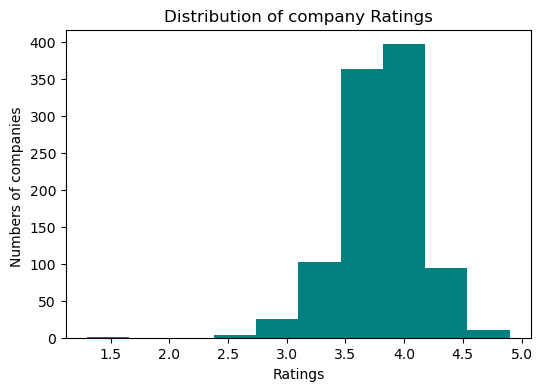

In [86]:
plt.figure(figsize =(6,4))
plt.hist(ambitionbox['Ratings'],bins = 10,color="teal")
plt.xlabel("Ratings")
plt.ylabel('Numbers of companies ')
plt.title("Distribution of company Ratings")
plt.show()

**Observation** : 
+ Most companies have ratings between 3.5 and 4.0.
+ Very few companies have low (<3) or very high (>4.5) ratings.

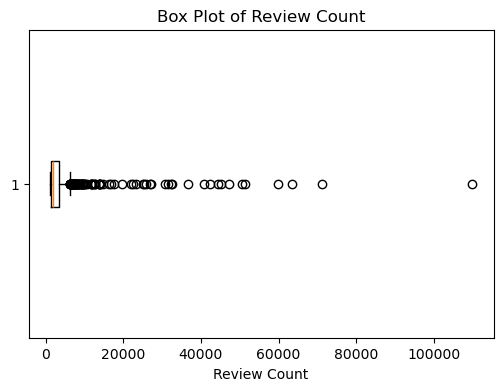

In [232]:
plt.figure(figsize=(6,4))
plt.boxplot(ambitionbox["Reviews_Count"],vert = False)
plt.xlabel("Review Count")
plt.title("Box Plot of Review Count")
plt.show()

**Observation** :
- Highly right-skewed
- Presence of extreme outliers
- Median much lower than mean

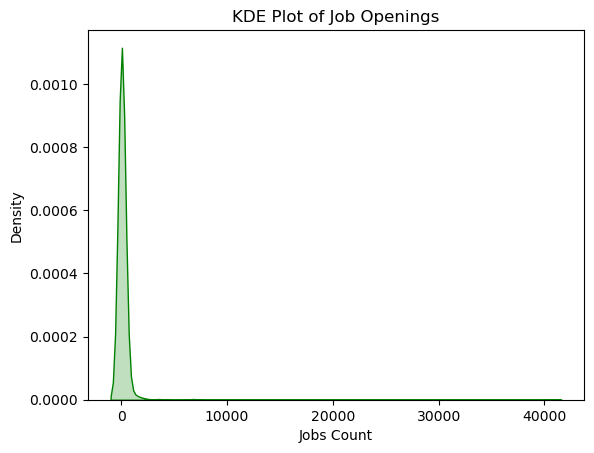

In [212]:
sns.kdeplot(ambitionbox["Jobs_Count"],fill=True,color="green")
plt.xlabel("Jobs Count")
plt.title("KDE Plot of Job Openings")
plt.show()

**Observation** :
- Density concentrated at low job counts
- Few companies dominate hiring

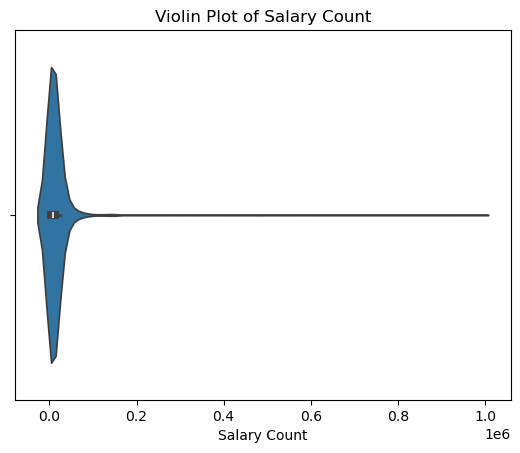

In [91]:
sns.violinplot(x=ambitionbox["Salary_Count"])
plt.xlabel("Salary Count")
plt.title("Violin Plot of Salary Count")
plt.show()

**Observation** :
- Salary data is heavily skewed
- Very few companies contribute high salary records

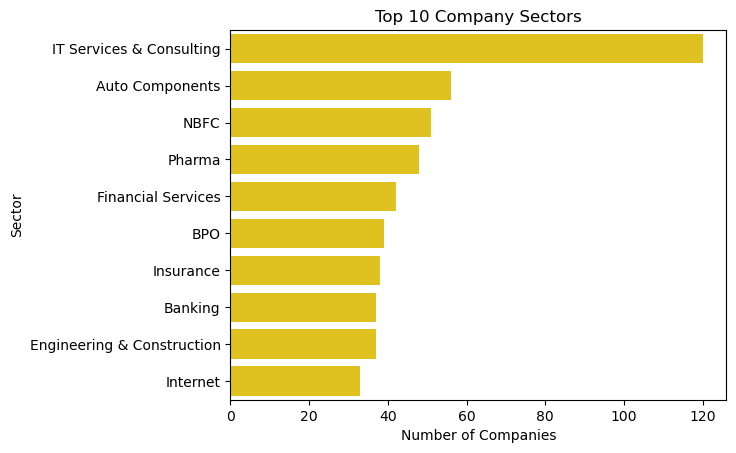

In [218]:
sns.countplot(y=ambitionbox["Company_Sector"],order=ambitionbox['Company_Sector']
              .value_counts().head(10).index,color="gold")
plt.xlabel("Number of Companies")
plt.ylabel("Sector")
plt.title("Top 10 Company Sectors")
plt.show()


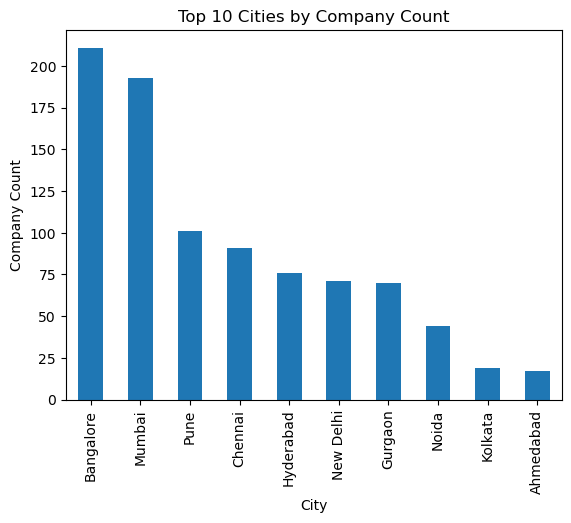

In [94]:
ambitionbox['Primary_City'].value_counts().head(10).plot(kind="bar",color="")
plt.xlabel("City")
plt.ylabel("Company Count")
plt.title("Top 10 Cities by Company Count")
plt.show()

**Observation** :
- Bangalore, Mumbai, Pune lead strongly
- Dataset is metro-centric

### 2.Bivariate Analysis

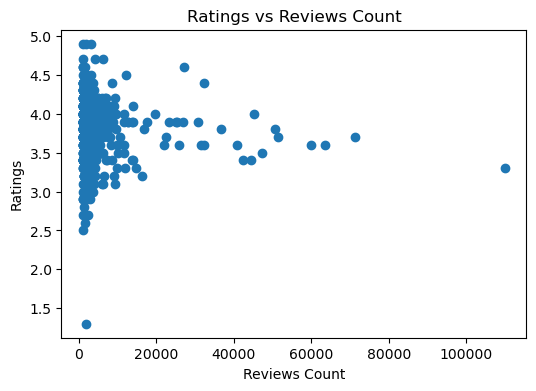

In [97]:
plt.figure(figsize=(6,4))
plt.scatter(ambitionbox["Reviews_Count"],ambitionbox["Ratings"])
plt.xlabel("Reviews Count")
plt.ylabel("Ratings")
plt.title("Ratings vs Reviews Count")
plt.show()

**Observation** :
+ Weak to moderate relationship
+ High reviews do not always mean high ratings
+ Ratings remain mostly stable

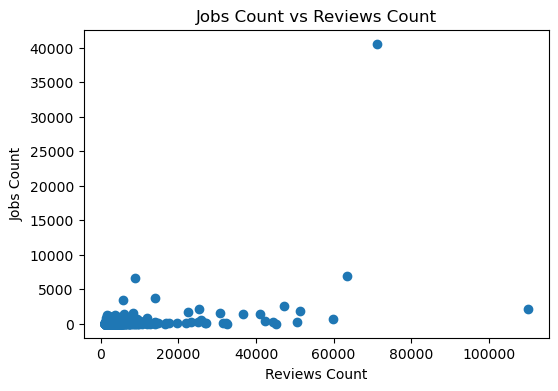

In [99]:
plt.figure(figsize=(6,4))
plt.scatter(ambitionbox["Reviews_Count"],ambitionbox["Jobs_Count"])
plt.xlabel("Reviews Count")
plt.ylabel("Jobs Count")
plt.title("Jobs Count vs Reviews Count")
plt.show()

**Observation** :
- Moderate positive correlation
- Companies with more reviews tend to have more job openings
- Relationship is not perfectly linear

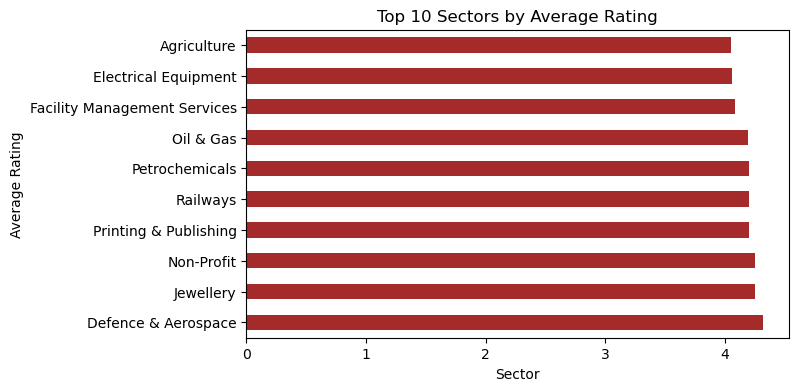

In [222]:
sector_rating = ambitionbox.groupby("Company_Sector")["Ratings"].mean().sort_values(ascending=False).head(10)
sector_rating.plot(kind="barh",figsize=(7,4),color="brown")
plt.xlabel("Sector")
plt.ylabel("Average Rating")
plt.title("Top 10 Sectors by Average Rating")
plt.show()

**Observation** :
+ Specialized sectors show higher ratings
+ Work culture differs significantly by sector

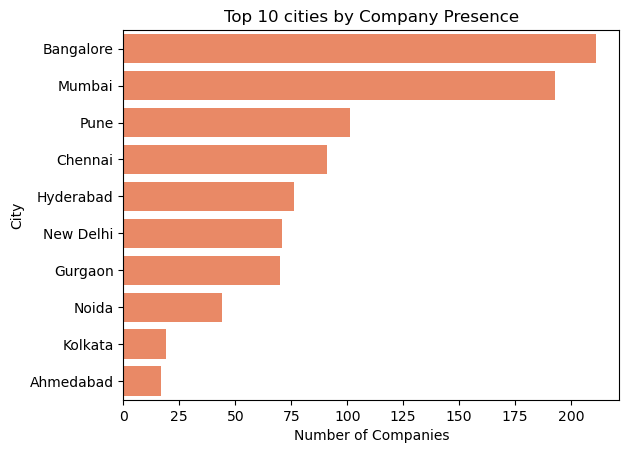

In [228]:
sns.countplot(y=ambitionbox['Primary_City'],order=ambitionbox
              ['Primary_City'].value_counts().head(10).index,color="coral")
plt.xlabel("Number of Companies")
plt.ylabel("City")
plt.title("Top 10 cities by Company Presence")
plt.show()

**Observation** :
- Strong metro dominance
- Bangalore leads hiring & company presence

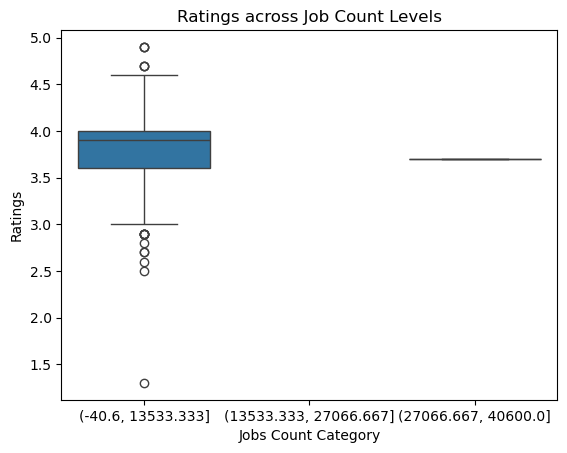

In [105]:
sns.boxplot(x=pd.cut(ambitionbox["Jobs_Count"],bins =3),
           y=ambitionbox["Ratings"])
plt.xlabel("Jobs Count Category")
plt.ylabel("Ratings")
plt.title("Ratings across Job Count Levels")
plt.show()

**Observation** :
+ Ratings are consistent across hiring levels
+ Large hiring does not guarantee higher satisfaction

### 3.Multivariate Analysis

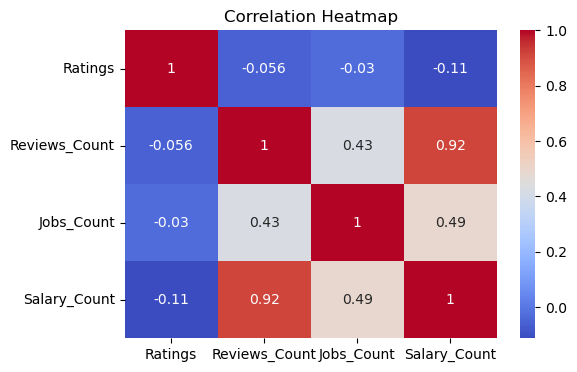

In [108]:
corr = ambitionbox[["Ratings","Reviews_Count","Jobs_Count","Salary_Count"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**Observation** :
+ Reviews_Count & Jobs_Count show the strongest positive correlation.
+ Ratings have weak correlation with volume-based metrics.
+ Employee satisfaction is not driven only by company size.

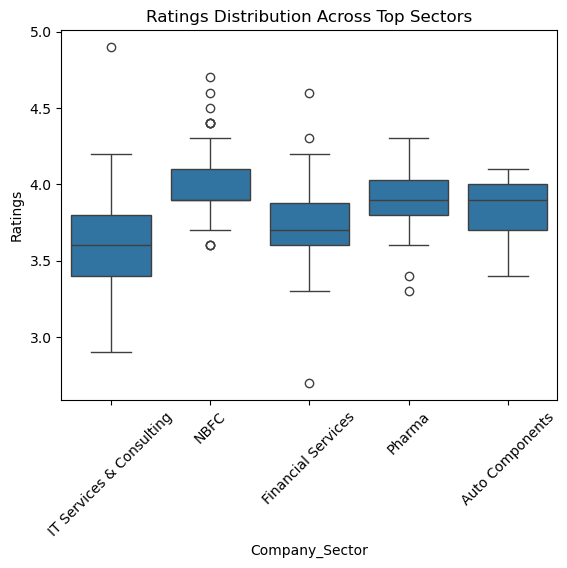

In [110]:
top_sectors = ambitionbox['Company_Sector'].value_counts().head(5).index
sns.boxplot(x="Company_Sector",y="Ratings",data=ambitionbox[ambitionbox['Company_Sector'].isin(top_sectors)])
plt.xticks(rotation=45)
plt.title("Ratings Distribution Across Top Sectors")
plt.show()

**Observation** :
- Some sectors show consistent ratings
- Others show wide variation, indicating mixed employee experiences

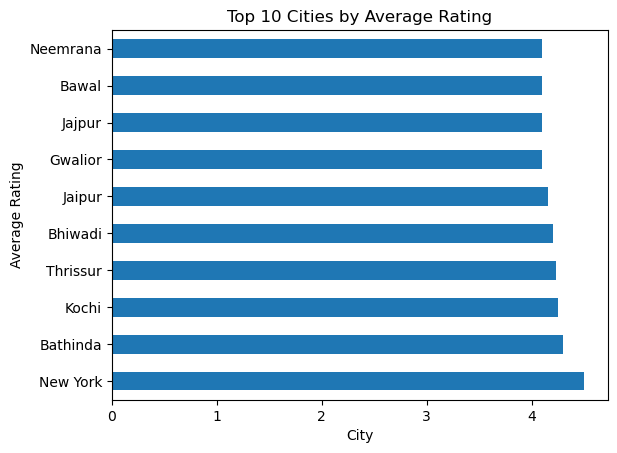

In [112]:
city_rating= ambitionbox.groupby("Primary_City")['Ratings'].mean().sort_values(ascending=False).head(10)
city_rating.plot(kind="barh")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.title("Top 10 Cities by Average Rating")
plt.show()

**Observation** :
+ Certain cities outperform others in employee satisfaction
+ Metro dominance remains clear

## Step6 : Business Insights

1. Employee ratings are generally stable and not strongly influenced by company size.
 
3. Metro cities dominate company presence and hiring activity.
 
5. Reviews and job openings show moderate positive correlation.
 
7. Specialized sectors tend to have higher employee satisfaction.

9. Company culture varies more by sector than by hiring volume.

**This analysis helps job seekers identify high-satisfaction sectors and cities, and enables companies to benchmark employee sentiment against peers.**